# Multiple Linear Regression

## Week 2 Exercise / Assessment

In our practice labs, we learned about the details on how we can implement linear regression using numpy library and gradient descent following our mathematical formulas. In this exercise, we are going to learn more about the practical part of multiple linear regression using machine learning libraries to solve a fun real-world problem.

In this exercise, we are going to try predicting calories of a McDonald's menu item using the nutritional facts via a multiple linear regression model. Then, we will observe how it generalizes to menu items from other similar restaurants. For the model implementation we are going to use [Scikit Learn](https://scikit-learn.org/stable/index.html) library's implementation. We will also get some practice on data analysis library [Pandas](https://pandas.pydata.org/), which is widely used in machine learning applications.

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Data Processing

Let's load and get familiar with our dataset

In [2]:
menu_df = pd.read_csv('data/mcdonalds_menu.csv')
menu_df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


It is good to check for null values. If necessary we should process these values to corresponding numerical values, or drop them.

In [3]:
# Check for null values
menu_df.isna().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In our case we don't have any null values so we can continue.

In [4]:
# Check our features
menu_df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [5]:
# Some statiscial information on our features
menu_df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


At this part we are doing to our feature engineering.

For example, some nutritions are given as % of daily values. By finding out the daily values for those nutritions, you can calculate the exact the values.

For this example, we are just going to take a subset of those nutritions with exact values, namely:
* Calories
* Total Fat
* Cholesterol
* Sodium
* Carbohydrates
* Dietary Fiber
* Sugars
* Protein

In [6]:
menu_df = menu_df[['Item', 'Calories', 'Total Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein']]
menu_df

,Item,Calories,Total Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
0,Egg McMuffin,300,13.0,260,750,31,4,3,17
1,Egg White Delight,250,8.0,25,770,30,4,3,18
2,Sausage McMuffin,370,23.0,45,780,29,4,2,14
3,Sausage McMuffin with Egg,450,28.0,285,860,30,4,2,21
4,Sausage McMuffin with Egg Whites,400,23.0,50,880,30,4,2,21
...,...,...,...,...,...,...,...,...,...
255,McFlurry with Oreo Cookies (Small),510,17.0,45,280,80,1,64,12
256,McFlurry with Oreo Cookies (Medium),690,23.0,55,380,106,1,85,15
257,McFlurry with Oreo Cookies (Snack),340,11.0,30,190,53,1,43,8
258,McFlurry with Reese's Peanut Butter Cups (Medium),810,32.0,60,400,114,2,103,21


Recall our statistical information on our dataset. There were some items with 0 calories. Let's insepct those entries and see if they really don't have any calories or there is a problem in the dataset:

In [7]:
menu_df[menu_df['Calories'] == 0]

,Item,Calories,Total Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
114,Diet Coke (Small),0,0.0,0,10,0,0,0,0
115,Diet Coke (Medium),0,0.0,0,20,0,0,0,0
116,Diet Coke (Large),0,0.0,0,35,0,0,0,0
117,Diet Coke (Child),0,0.0,0,15,0,0,0,0
122,Diet Dr Pepper (Small),0,0.0,0,70,0,0,0,2
123,Diet Dr Pepper (Medium),0,0.0,0,100,0,0,0,3
124,Diet Dr Pepper (Large),0,0.0,0,140,0,0,0,4
125,Diet Dr Pepper (Child),0,0.0,0,50,0,0,0,1
136,Dasani Water Bottle,0,0.0,0,0,0,0,0,0
137,Iced Tea (Small),0,0.0,0,10,0,0,0,0


The items really don't have any calories so the dataset is intact.

Now, let's visualize the relation of each feature.

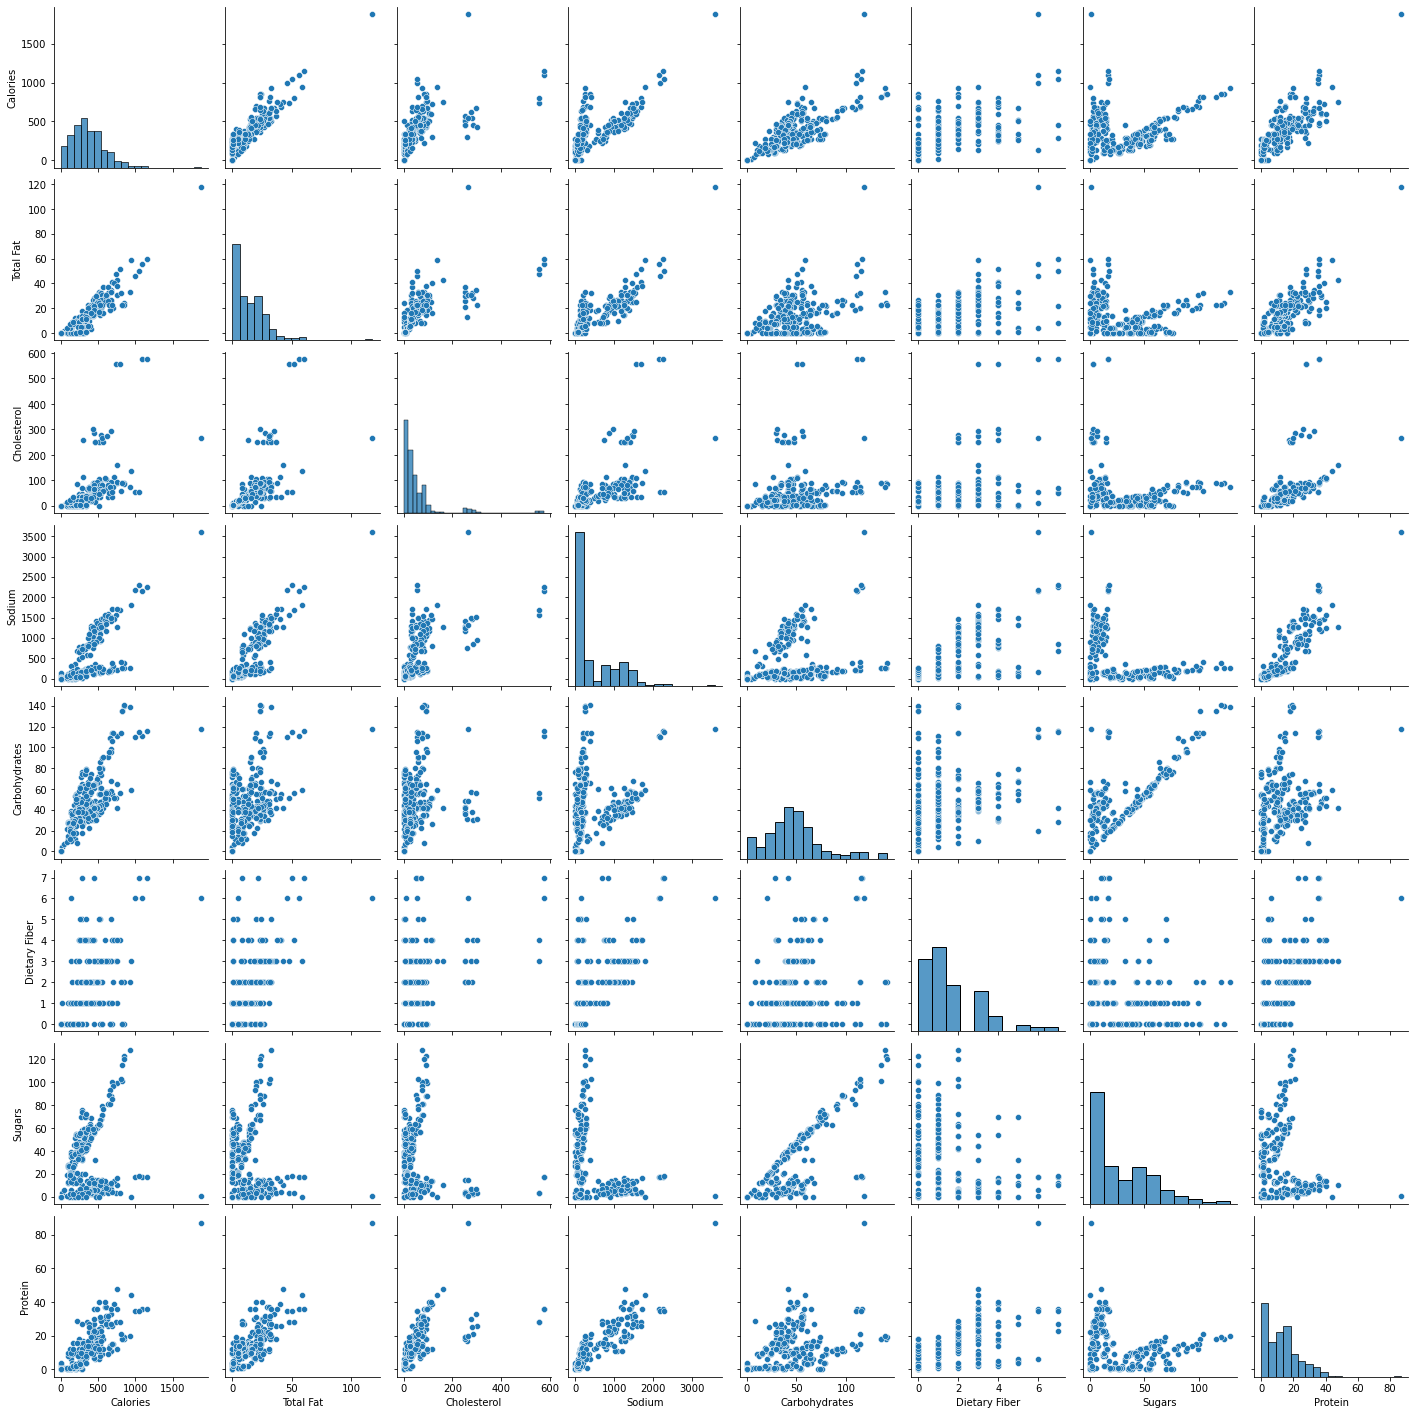

In [8]:
sns.pairplot(menu_df)

We see some sort of a linear relation between Calories and Total Fat, Sodium, Carbohydrates, Sugars and Protein.

In our case, feature scaling (normalization) may not be that crucial because Sklearn's implementation uses Normal Equation rather than Gradient Descent and we may need to get more interpretable outputs for our assignment. (If we scale our training data, whenever we get new values to predict, we are going to need to scale them as well. This implies that the predictions we get are also going to be scaled.)

However, as a demonstration, the following code cell shows how we can perform Z-score normalization.

In [9]:
# Let's do Feature Scaling
standard_scaler = StandardScaler() # Z-score normalization

menu_df_scaled = menu_df.copy()
# Ignore Item columns as it is not numerical
menu_df_scaled[menu_df_scaled.columns[1:]] = standard_scaler.fit_transform(menu_df[menu_df.columns[1:]])

In [10]:
menu_df_scaled.describe()

,Calories,Total Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
count,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02
mean,5.657867e-18,3.779028e-17,-2.333603e-16,3.057383e-16,3.138515e-17,9.505217e-16,-1.942890e-16,-1.782762e-16
std,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00
min,-1.535688e+00,-9.990642e-01,-6.307865e-01,-8.608032e-01,-1.679070e+00,-1.042225e+00,-1.027895e+00,-1.169615e+00
25%,-6.599848e-01,-8.315589e-01,-5.733821e-01,-6.741439e-01,-6.151588e-01,-1.042225e+00,-8.270189e-01,-8.188651e-01
50%,-1.178831e-01,-2.232500e-01,-2.289554e-01,-5.308938e-01,-1.186670e-01,-4.031249e-01,-4.165327e-01,-1.173662e-01
75%,5.493191e-01,5.701963e-01,1.154712e-01,6.411530e-01,4.487522e-01,8.750760e-01,6.489848e-01,4.964454e-01
max,6.303938e+00,7.323306e+00,5.970725e+00,5.390113e+00,3.321312e+00,3.431478e+00,3.443785e+00,6.459186e+00


A standard deviation (std) of 1 indicates a Normal Distribution.

## Model Training and Evaluation

Before starting to train our model, we need to split our dataset and it is an essential step in any supervised machine learning application.

The best practice is to divide our dataset into 3 groups: training, validation and test datasets. The sizes of the subsets can vary but most often 80:10:10 ratio for training:validation:test can be used. 

For further information, you can check out the following article: [Wikipedia - Training, validation, and test data sets](https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets)

In our example, Sklearn's linear regression model does not have many hyperparameters to finetune so we are only going to have training and test datasets.

**Q1:** Using Sklearn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function, separate our dataset into training and test datasets with a test size of 20%. Make sure to use the random seed during your splits.

As the first step, let's also split our features (nutritions) and our target values (calories) into separate dataframes using pandas library.

**Hint:** You need to drop Calories and Item columns for the training dataset (X).

In [13]:
# To get reproducible outputs
random_seed = 123

### START CODE HERE ###
X = menu_df.drop(['Item', 'Calories'], axis=1)
Y = menu_df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_seed)
### END CODE HERE ###

Let's verify the the split ratio and check the data. You should see 80.0 and 20.0 percentages.

In [14]:
print('Train Test percentages:', len(X_train)/len(X)*100, 100-len(X_train)/len(X)*100 )

Train Test percentages: 80.0 20.0


Let's also check our data:

In [15]:
X_train.head()

,Total Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
205,4.5,15,40,20,0,19,1
244,16.0,60,160,90,0,79,12
204,9.0,35,75,43,0,41,2
21,22.0,35,1030,44,2,15,11
157,9.0,25,115,38,1,36,9


In [16]:
y_train.head()

205    120
244    550
204    250
21     420
157    260
Name: Calories, dtype: int64

**Q2:** Everything looks fine and our data is ready to be processed. Now, let's define our Linear Regression model using [Sklearn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and fit it to our data.

We are also going to evaluate our model's performance via checking the Cost function (Mean Squared Error) and accuracy.

**Hint:** For calculating accuracy, you can use r2 scoring (via r2_score function)

In [17]:
### START CODE HERE ###
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Calculate mean squared error
cost = mean_squared_error(y_test, y_pred)

# Calculate accuracy using r2_score
acc = r2_score(y_test, y_pred)
### END CODE HERE ###

In [18]:
# The coefficients
print('Model Coefficients (w\'s): \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.5f' % cost)
# Accuracy
print('Model Accuracy: %.2f' % acc)

Model Coefficients (w's): 
 [ 9.00963699e+00 -6.49622759e-03 -3.69270486e-03  4.10274654e+00
  3.95933361e-02 -1.33449060e-01  4.06934149e+00]
Mean squared error: 30.39653
Model Accuracy: 1.00


Looks like our model is able to predict the Calories really accurately! We can also confirm this by visualising the predictions and target values, comparing their numerical values:

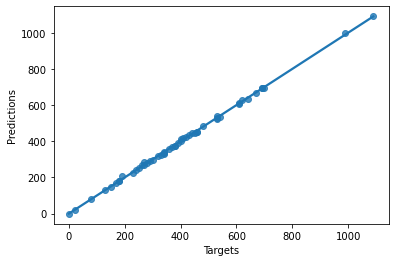

In [19]:
ax = sns.regplot(x=y_test,y=y_pred,ci=None)
ax.set(xlabel='Targets', ylabel='Predictions')
plt.show()

The plot confirms our high accuracy as we see a line with almost 45 degree angle, meaning that for the target values, we get almost equal predictions.

## Predictions with Model

Now let's see how well our model generalizes for menu items from similar restaurants. Using our model, let's try to predict the calories for a Whopper, a menu item from another restaurant chain. The nutritions are available in the following address: https://www.burgerking.ca/nutrition-explorer

In [20]:
whopper = pd.DataFrame(data=[[39, 95, 1217, 49, 3, 14, 29]], columns=['Total Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein'])
whopper

,Total Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
0,39,95,1217,49,3,14,29


In [21]:
regr.predict(whopper)

array([661.69329931])

We have a pretty accurate prediction and it seems our model generalizes quite well.
Our linear regression model predicts that a Whopper has 662 kcal and the official website states that it has 660 kcal!

**(Optional):** Try predicting calories for a different menu item from another restaurant and observe our model's performance. Feel free to share your findings on Discord as well!